# CTA 'L' Ridership Analysis

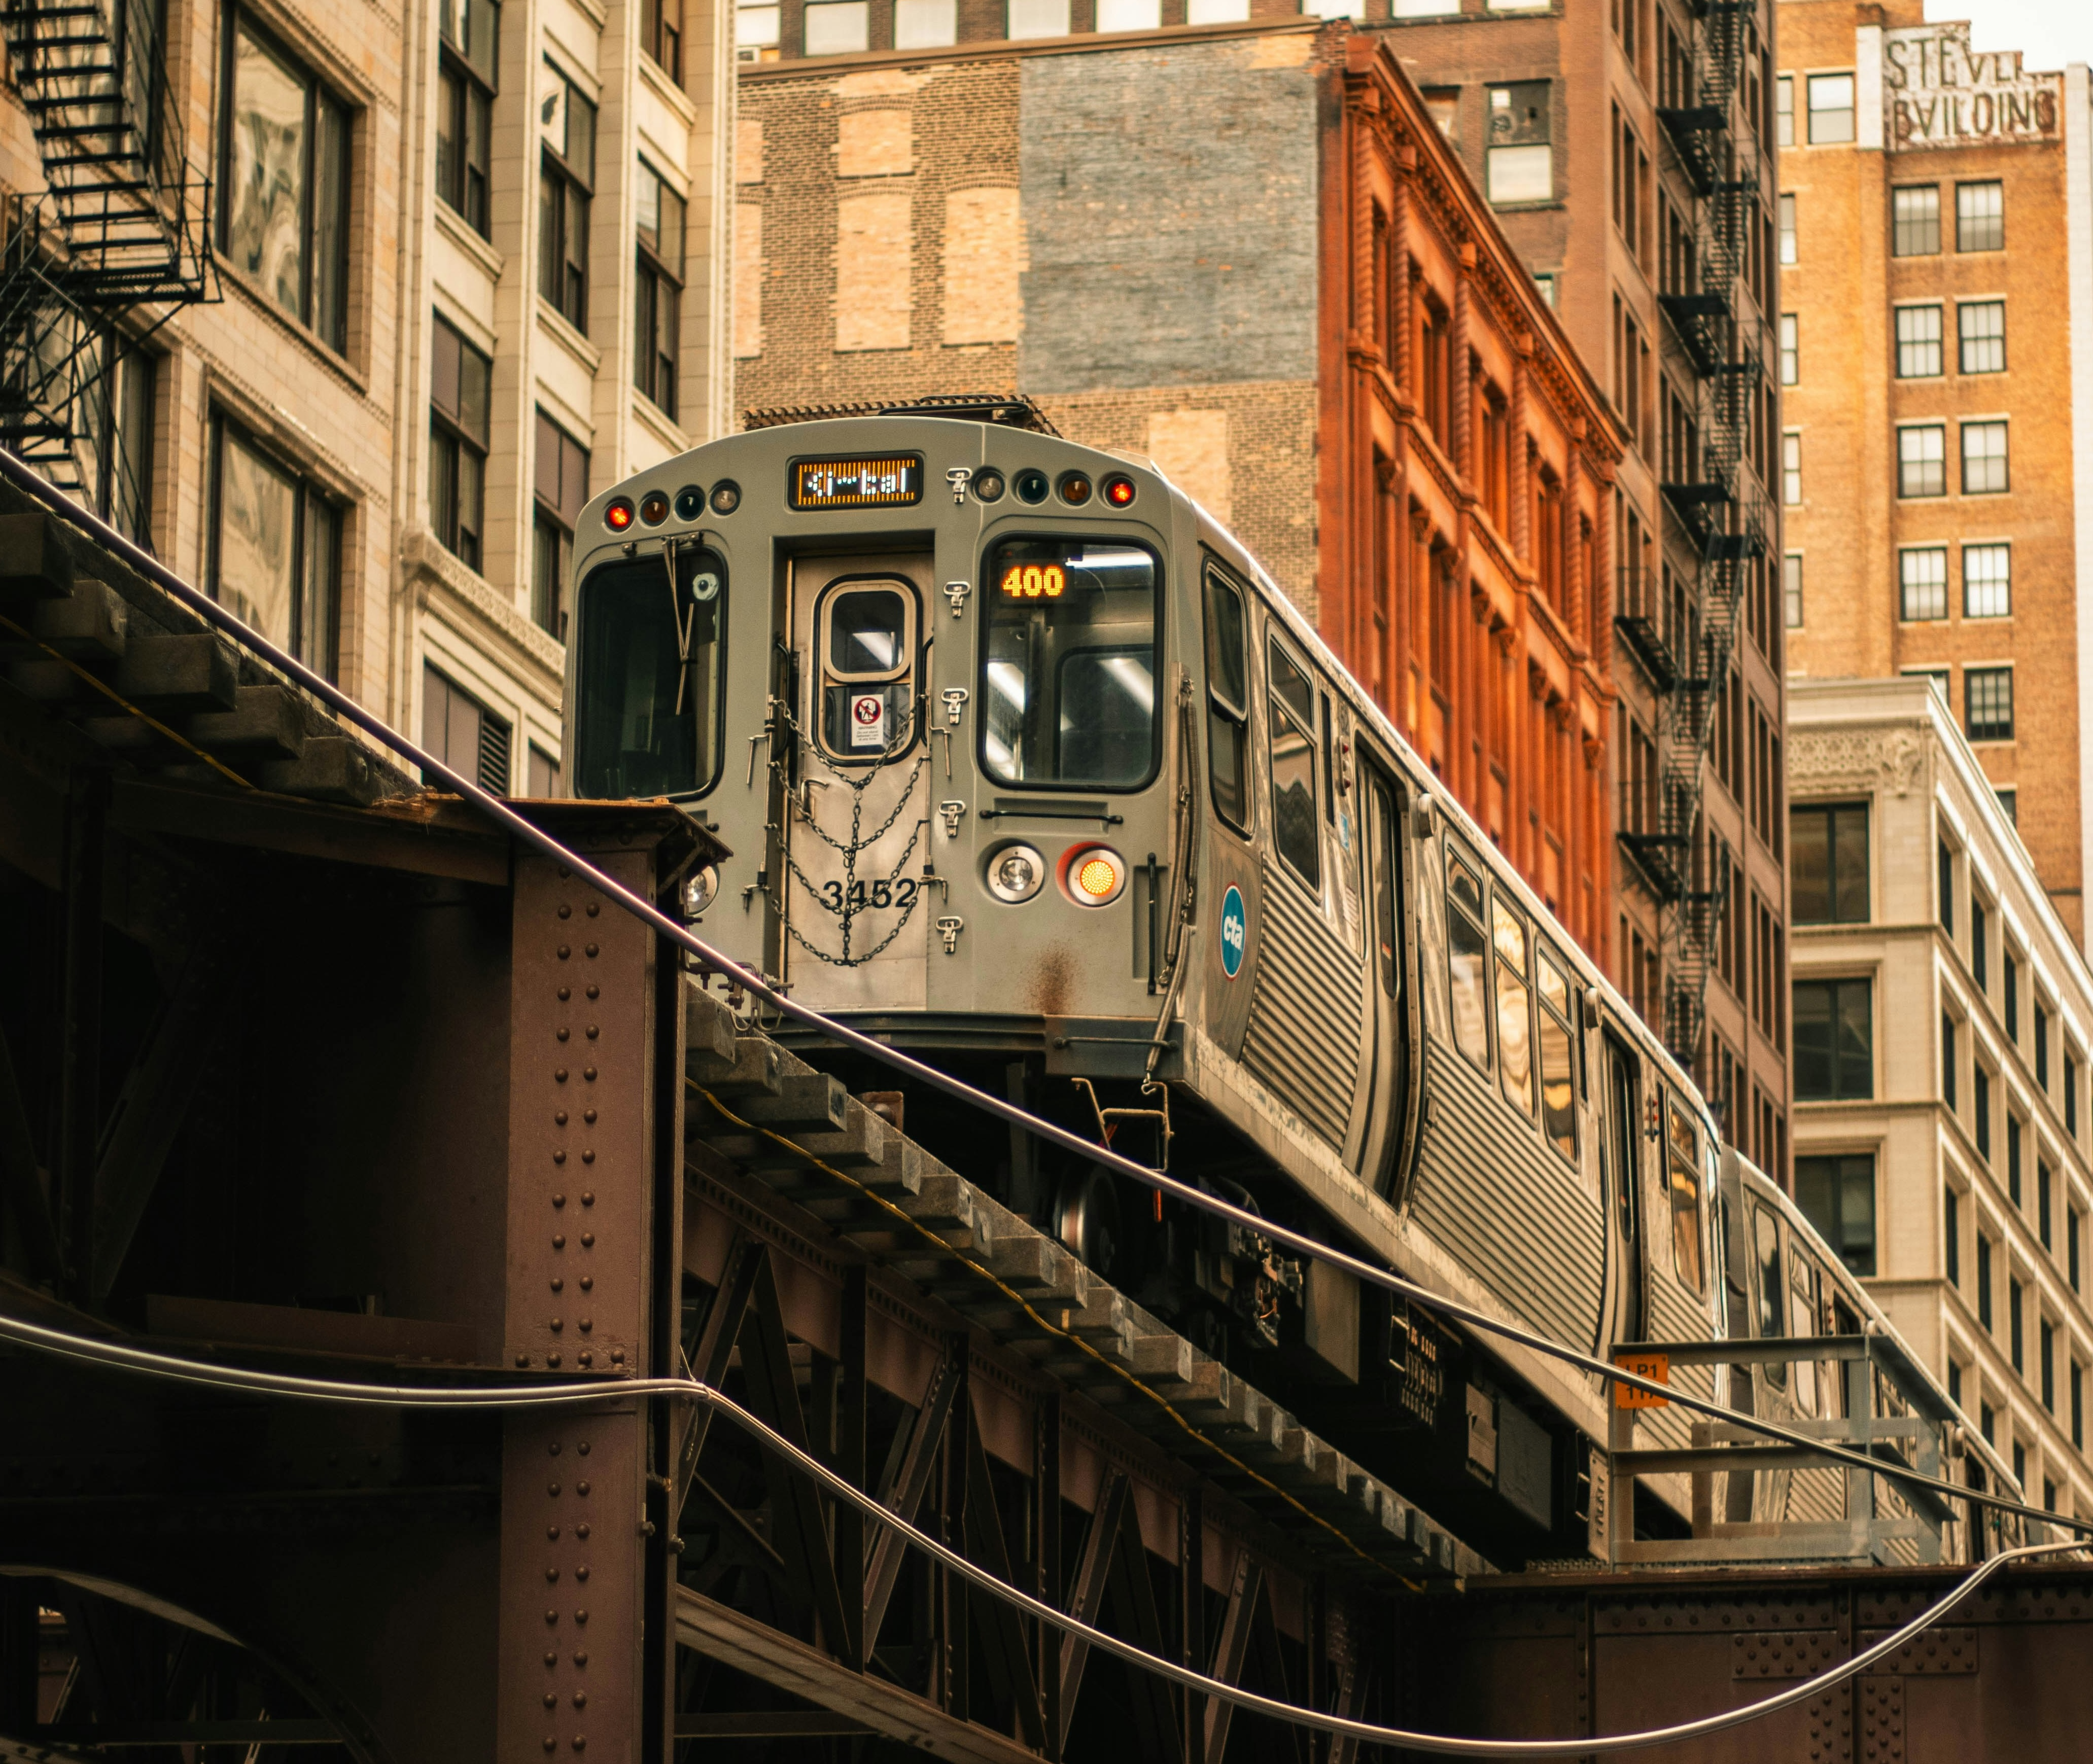
Photo by <a href="https://unsplash.com/@shenny_visuals?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Justin Shen</a> on <a href="https://unsplash.com/photos/a-train-traveling-over-a-bridge-next-to-tall-buildings-3UD7z1MSLmI?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>

## Table of Contents
1. [Project Overview](#project-overview)  
    * 1.1 [Key Questions](#key-questions)  
2. [Data Import and Preparation](#data-import-and-preparation)  
3. [Analysis](#analysis)  
   * 3.1 [Ridership Recovery Post-COVID](#ridership-recovery-post-covid)
   * 3.2 [Ridership by Station](#ridership-by-station)
   * 3.3 [ADA Accessibility by Line](#ada-accessibility-by-line)  
4. [Key Takeaways](#key-takeaways)  
5. [Next Steps](#next-steps)  

# 1. Project Overview<a class="anchor" id="project-overview"></a>
This project analyzes ridership patterns on Chicago's CTA elevated rail system ("The L") using data from the City of Chicago Open Data Portal. It explores trends in ridership over time, accessibility, and station activity.

## 1.1 Key Questions<a class="anchor" id="key-questions"></a>
   a. How has ridership changed over time? Has it recovered to pre-COVID levels?

   b. Which stations are the busiest and least busy post-COVID? 

   c. Which lines are the most ADA accessible?

# 2. Data Import and Preparation<a class="anchor" id="data-import-and-preparation"></a>

In [1]:
# importing necessary packages
import pandas as pd
import numpy as np
import calendar
import folium
from branca.element import Template, MacroElement
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'notebook'  
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
# reads in data
ridership_data = pd.read_csv('data/final_ridership.csv')

In [3]:
# previews the first 5 rows of the dataframe
ridership_data.head()

station_id  map_id           station_descriptive_name   ride_date day_type  \
0       41090   41090                  Monroe (Red Line)  2024-07-27        A   
1       41090   41090                  Monroe (Red Line)  2024-07-31        W   
2       41120   41120  35th-Bronzeville-IIT (Green Line)  2024-07-27        A   
3       41120   41120  35th-Bronzeville-IIT (Green Line)  2024-07-31        W   
4       41130   41130              Halsted (Orange Line)  2024-07-07        U   

   rides ada_approved red blue green brownn purple pexp yellow pnk orange  \
0   2961            f   t    f     f      f      f    f      f   f      f   
1   5017            f   t    f     f      f      f    f      f   f      f   
2    643            t   f    f     t      f      f    f      f   f      f   
3    980            t   f    f     t      f      f    f      f   f      f   
4    799            t   f    f     f      f      f    f      f   f      t   

                  location  
0  (41.880745, -87.627696)  
1  (41.880745, -87.627696)  
2  (41.831677, -87.625826)  
3  (41.831677, -87.625826)  
4   (41.84678, -87.648088)

In [4]:
# previews the structure of the dataframe
ridership_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251166 entries, 0 to 1251165
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   station_id                1251166 non-null  int64 
 1   map_id                    1251166 non-null  int64 
 2   station_descriptive_name  1251166 non-null  object
 3   ride_date                 1251166 non-null  object
 4   day_type                  1251166 non-null  object
 5   rides                     1251166 non-null  int64 
 6   ada_approved              1251166 non-null  object
 7   red                       1251166 non-null  object
 8   blue                      1251166 non-null  object
 9   green                     1251166 non-null  object
 10  brownn                    1251166 non-null  object
 11  purple                    1251166 non-null  object
 12  pexp                      1251166 non-null  object
 13  yellow                    1251166 non-null

In [5]:
# converts ride_date column data type to datatime type
ridership_data['ride_date'] = pd.to_datetime(ridership_data['ride_date'])

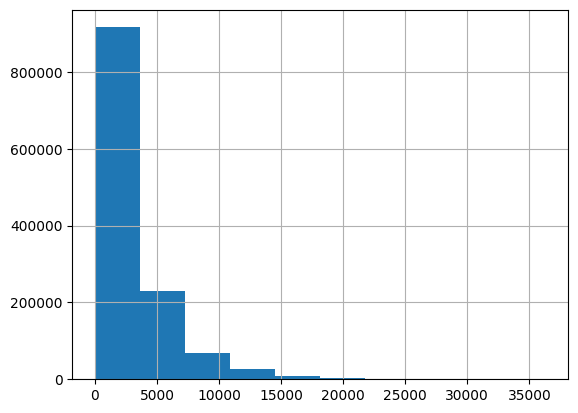

In [6]:
# Plots a histogram to visualize the distribution of daily ridership counts across all stations
ridership_data['rides'].hist();

In [23]:
# reading in and previewing the stations_info dataframe
stations_data = pd.read_csv('data/CTA_-_System_Information_-_List_of__L__Stops_20250718.csv')
stations_data.head()

STOP_ID DIRECTION_ID                     STOP_NAME  STATION_NAME  \
0    30082            E           Cicero (Loop-bound)        Cicero   
1    30151            E     Central Park (Loop-bound)  Central Park   
2    30184            W  Halsted/63rd (Ashland-bound)       Halsted   
3    30044            N     Cumberland (O'Hare-bound)    Cumberland   
4    30092            E         Racine (O'Hare-bound)        Racine   

   STATION_DESCRIPTIVE_NAME  MAP_ID    ADA    RED   BLUE      G    BRN      P  \
0        Cicero (Pink Line)   40420   True  False  False  False  False  False   
1  Central Park (Pink Line)   40780   True  False  False  False  False  False   
2      Halsted (Green Line)   40940   True  False  False   True  False  False   
3    Cumberland (Blue Line)   40230   True  False   True  False  False  False   
4        Racine (Blue Line)   40470  False  False   True  False  False  False   

    Pexp      Y    Pnk      O                 Location  
0  False  False   True  False   (41.85182, -87.745336)  
1  False  False   True  False  (41.853839, -87.714842)  
2  False  False  False  False  (41.778943, -87.644244)  
3  False  False  False  False  (41.984246, -87.838028)  
4  False  False  False  False   (41.87592, -87.659458)

In [24]:
# convert all column names to lowercase
stations_data.columns = stations_data.columns.str.lower()

# Rename line columns from abbreviations to full names
stations_data = stations_data.rename(columns={
    'red': 'red',
    'blue': 'blue',
    'g': 'green',
    'brn': 'brown',
    'p': 'purple',
    'pexp': 'purple_express',
    'y': 'yellow',
    'pnk': 'pink',
    'o': 'orange'
})

# Deduplicate by map_id to ensure each station is counted once
deduped_stations = stations_data.drop_duplicates(subset='map_id').copy()

# Define the actual line columns
line_columns = ['red', 'blue', 'green', 'brown', 'purple', 'purple_express', 'yellow', 'pink', 'orange']

# 3. Analysis<a class="anchor" id="analysis"></a>

## 3.1 Ridership Recovery Post-COVID<a class="anchor" id="ridership-recovery-post-covid"></a>

In [7]:
# Extract year and month from ride_date
ridership_data['year'] = ridership_data['ride_date'].dt.year
ridership_data['month'] = ridership_data['ride_date'].dt.month

In [8]:
# Calculates total annual ridership by summing daily rides for each year
yearly_ridership = ridership_data.groupby('year')['rides'].sum().astype(int)

In [9]:
def millions(x, pos):
    val = x * 1e-6
    return f'{val:.1f}'.rstrip('0').rstrip('.')

# Reset index to get 'year' and 'total_rides' as columns
yearly_ridership = yearly_ridership.reset_index()
yearly_ridership.columns = ['year', 'total_rides']

In [10]:
# Creates interactive line plot of ridership counts

fig = go.Figure()

# Pre-COVID (2001–2019)
fig.add_trace(go.Scatter(
    x=yearly_ridership[yearly_ridership['year'] <= 2019]['year'],
    y=yearly_ridership[yearly_ridership['year'] <= 2019]['total_rides'],
    mode='lines+markers',
    name='Pre-COVID',
    line=dict(color='steelblue', width=3),
    marker=dict(size=5)
))

# COVID-era (2020–2022)
fig.add_trace(go.Scatter(
    x=yearly_ridership[(yearly_ridership['year'] >= 2020) & (yearly_ridership['year'] <= 2022)]['year'],
    y=yearly_ridership[(yearly_ridership['year'] >= 2020) & (yearly_ridership['year'] <= 2022)]['total_rides'],
    mode='lines+markers',
    name='COVID Era',
    line=dict(color='grey', width=3, dash='dash'),
    marker=dict(size=5)
))

# Post-COVID (2023+)
fig.add_trace(go.Scatter(
    x=yearly_ridership[yearly_ridership['year'] >= 2023]['year'],
    y=yearly_ridership[yearly_ridership['year'] >= 2023]['total_rides'],
    mode='lines+markers',
    name='Post-COVID',
    line=dict(color='orange', width=3, dash='dot'),
    marker=dict(size=5)
))

# Layout with increased font sizes
fig.update_layout(
    title={
        'text': "CTA ‘L’ Ridership Has Not Recovered to Pre-Pandemic Levels<br><sup>Total annual boardings, 2001–2023, in millions</sup>",
        'x': 0,
        'xanchor': 'left',
        'font': dict(size=22)
    },
    xaxis=dict(
        title='Year',
        tickvals=list(range(2000, 2025, 5)),
        showgrid=False,
        color='gray',
        showline=True,
        linecolor='lightgray',
        titlefont=dict(size=16),
        tickfont=dict(size=14)
    ),
    yaxis=dict(
        tickformat=',.1s',
        showgrid=False,
        color='gray',
        showline=True,
        linecolor='lightgray',
        titlefont=dict(size=16),
        tickfont=dict(size=14)
    ),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="left",
        x=0,
        font=dict(size=14)
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black', size=14),  # base font size
    margin=dict(t=100)
)

fig.show()
pio.write_html(fig, file="docs/figures/annual_ridership.html", auto_open=False, include_plotlyjs='cdn')
fig.show()

**Interpretation:**
This line graph shows that CTA ridership steadily increased until around 2015, after which it began a gradual decline. Ridership then plummeted sharply in 2020 with the onset of the COVID-19 pandemic. Although it has rebounded somewhat since then, it remains well below pre-COVID levels.

### Monthly Ridership Comparison: Pre-COVID vs. Post-COVID

In [11]:
# creates slices of ridership_data representing pre- and post-covid
pre_covid = ridership_data[
    (ridership_data['year'] < 2020) |
    ((ridership_data['year'] == 2020) & (ridership_data['month'] < 3))
]

post_covid = ridership_data[
    (ridership_data['year'] > 2023) |
    ((ridership_data['year'] == 2023) & (ridership_data['month'] > 5))
]

In [12]:
datasets = [pre_covid, post_covid]

def calculate_monthly_avg_ridership(pre_df, post_df):
    """
    Calculates the average total monthly ridership for pre- and post-COVID datasets.

    Parameters:
    -----------
    pre_df : pandas.DataFrame
        DataFrame containing pre-COVID ridership data. Must include a 'ride_date' column (datetime type) and 'rides'.
    post_df : pandas.DataFrame
        DataFrame containing post-COVID ridership data. Same structure as pre_df.

    Returns:
    --------
    pandas.DataFrame
        A DataFrame indexed by month name (January–December), with two columns:
        - 'avg_pre_covid_rides': average total ridership per month (pre-COVID)
        - 'avg_post_covid_rides': average total ridership per month (post-COVID)
    """

    def process(df):
        df = df.copy()

        # Convert each ride_date to a month-year period (e.g., 2023-05)
        df['month_year'] = df['ride_date'].dt.to_period('M')

        # Sum total rides per month-year
        monthly_totals = df.groupby('month_year')['rides'].sum().reset_index()

        # Extract just the month number for further grouping (1–12)
        monthly_totals['month'] = monthly_totals['month_year'].dt.month

        # Calculate the average total ridership per calendar month across all years
        avg_by_month = monthly_totals.groupby('month')['rides'].mean().round(0).astype(int)
        return avg_by_month

    # Process both pre- and post-COVID datasets
    pre_avg = process(pre_df)
    post_avg = process(post_df)

    # Combine the two average series side-by-side
    comparison = pd.concat([pre_avg, post_avg], axis=1)

    # Rename the columns to clearly indicate time period
    comparison.columns = ['avg_pre_covid_rides', 'avg_post_covid_rides']

    # Convert numeric month index to full month name (e.g., 1 → January)
    comparison.index = comparison.index.map(lambda x: calendar.month_name[x])
    comparison.index.name = 'month'

    return comparison

In [13]:
# Generate a comparison table of average monthly ridership: pre-COVID vs. post-COVID
avg_ridership_comparison = calculate_monthly_avg_ridership(pre_covid, post_covid)
avg_ridership_comparison

avg_pre_covid_rides  avg_post_covid_rides
month                                               
January               12959114               7424130
February              12629832               7576030
March                 14108834               8686651
April                 13945851               9083476
May                   14330408               9585547
June                  14523167               9026587
July                  14698472               9016599
August                14784369               9722895
September             14872444               9679792
October               15776126              10291860
November              13821052               8646083
December              12614230               7627914

In [14]:
# Format numbers in millions
formatted_table = avg_ridership_comparison.copy()
formatted_table['Month'] = formatted_table.index.str.title()
formatted_table['Pre-COVID Avg (M)'] = (formatted_table['avg_pre_covid_rides'] / 1e6).round(1)
formatted_table['Post-COVID Avg (M)'] = (formatted_table['avg_post_covid_rides'] / 1e6).round(1)

# Select and rename columns
formatted_table = formatted_table[['Month', 'Pre-COVID Avg (M)', 'Post-COVID Avg (M)']]

In [15]:
formatted_table['Percent Recovered (%)'] = (
    formatted_table['Post-COVID Avg (M)'] / formatted_table['Pre-COVID Avg (M)'] * 100
).round(1)

In [16]:
formatted_table

Month  Pre-COVID Avg (M)  Post-COVID Avg (M)  \
month                                                         
January      January               13.0                 7.4   
February    February               12.6                 7.6   
March          March               14.1                 8.7   
April          April               13.9                 9.1   
May              May               14.3                 9.6   
June            June               14.5                 9.0   
July            July               14.7                 9.0   
August        August               14.8                 9.7   
September  September               14.9                 9.7   
October      October               15.8                10.3   
November    November               13.8                 8.6   
December    December               12.6                 7.6   

           Percent Recovered (%)  
month                             
January                     56.9  
February                    60.3  
March                       61.7  
April                       65.5  
May                         67.1  
June                        62.1  
July                        61.2  
August                      65.5  
September                   65.1  
October                     65.2  
November                    62.3  
December                    60.3

**Interpretation:**
The table above displays average monthly ridership, comparing pre-COVID and post-COVID periods. Consistent with the earlier line graph, no post-COVID month has reached the ridership levels observed before the pandemic.

In [33]:
# resets index
avg_ridership_comparison = avg_ridership_comparison.reset_index()

# Create figure
fig = go.Figure()

# Add lines for each month
for i, month in enumerate(avg_ridership_comparison['month']):
    fig.add_trace(go.Scatter(
        x=[avg_ridership_comparison['avg_pre_covid_rides'][i], avg_ridership_comparison['avg_post_covid_rides'][i]],
        y=[month, month],
        mode='lines',
        line=dict(color='lightgray', width=2),
        showlegend=False
    ))

# Add pre-COVID markers
fig.add_trace(go.Scatter(
    x=avg_ridership_comparison['avg_pre_covid_rides'],
    y=avg_ridership_comparison['month'],
    mode='markers',
    name='Pre-COVID',
    marker=dict(color='steelblue', size=10)
))

# Add post-COVID markers
fig.add_trace(go.Scatter(
    x=avg_ridership_comparison['avg_post_covid_rides'],
    y=avg_ridership_comparison['month'],
    mode='markers',
    name='Post-COVID',
    marker=dict(color='orange', size=10)
))

# Customize layout
# Customize layout
fig.update_layout(
    title={
        'text': "Average CTA 'L' Ridership Was Lower Post-COVID for Every Month<br><sup>Average daily boardings by month, pre-COVID vs. post-COVID</sup>",
        'x': 0,
        'xanchor': 'left'
    },
    xaxis_title='Average Daily Ridership',
    yaxis=dict(
        title='',
        categoryorder='array',
        categoryarray=list(avg_ridership_comparison['month'])[::-1],
        showgrid=False,
        linecolor='lightgray',
        color='gray'
    ),
    xaxis=dict(
        showgrid=False,
        linecolor='lightgray',
        color='gray'
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='left',
        x=0
    ),
    font=dict(color='black'),
    margin=dict(t=100)
)
fig.show()

**Interpretation:**
This side-by-side bar chart visualizes the table above, showing average monthly ridership before and after COVID. Blue bars represent pre-COVID levels, while orange bars represent post-COVID averages.

In [18]:
# Calculate total post-COVID ridership as a percentage of total pre-COVID ridership
(avg_ridership_comparison['avg_post_covid_rides'].sum() / avg_ridership_comparison['avg_pre_covid_rides'].sum()).round(2) * 100

63.0

In [19]:
fig = go.Figure(go.Indicator(
    mode = "number",
    value = 63,
    number = {'suffix': "%", 'font': {'size': 60}},
    title = {'text': "Post-COVID Ridership Recovery", 'font': {'size': 20}},
    domain = {'x': [0, 1], 'y': [0, 1]}
))

fig.update_layout(
    paper_bgcolor='white',
    font=dict(color='gray'),
    margin=dict(t=50, b=0)
)

fig.show()

**Interpretation:**  
The result shows that average monthly post-COVID ridership is only about **63%** of pre-COVID levels, indicating that the CTA has not yet fully recovered in terms of ridership.

## 3.2 Ridership by Station <a class="anchor" id="ridership-by-station"></a>

In [20]:
# gets a preview of the post-COVID dataframe
post_covid.head() 

station_id  map_id           station_descriptive_name  ride_date day_type  \
0       41090   41090                  Monroe (Red Line) 2024-07-27        A   
1       41090   41090                  Monroe (Red Line) 2024-07-31        W   
2       41120   41120  35th-Bronzeville-IIT (Green Line) 2024-07-27        A   
3       41120   41120  35th-Bronzeville-IIT (Green Line) 2024-07-31        W   
4       41130   41130              Halsted (Orange Line) 2024-07-07        U   

   rides ada_approved red blue green brownn purple pexp yellow pnk orange  \
0   2961            f   t    f     f      f      f    f      f   f      f   
1   5017            f   t    f     f      f      f    f      f   f      f   
2    643            t   f    f     t      f      f    f      f   f      f   
3    980            t   f    f     t      f      f    f      f   f      f   
4    799            t   f    f     f      f      f    f      f   f      t   

                  location  year  month  
0  (41.880745, -87.627696)  2024      7  
1  (41.880745, -87.627696)  2024      7  
2  (41.831677, -87.625826)  2024      7  
3  (41.831677, -87.625826)  2024      7  
4   (41.84678, -87.648088)  2024      7

In [21]:
# Aggregates total ridership per station for the post-COVID period
station_ridership = post_covid.groupby('station_descriptive_name')['rides'].sum().reset_index()

# Sorts stations in descending order of total ridership
station_ridership = station_ridership.sort_values('rides', ascending=False)

# Renames the 'rides' column to 'total_rides' for clarity
station_ridership = station_ridership.rename(columns={'rides': 'total_rides'})

# Displays the final DataFrame
station_ridership

station_descriptive_name  total_rides
93                                     Lake (Red Line)      6358194
110                                 O'Hare (Blue Line)      5791109
43   Clark/Lake (Blue, Brown, Green, Orange, Purple...      5263110
131  State/Lake (Brown, Green, Orange, Pink & Purpl...      4820881
38                                  Chicago (Red Line)      4737646
..                                                 ...          ...
67                                Halsted (Green Line)       181999
90                                 Kostner (Pink Line)       180235
89                             King Drive (Green Line)       161408
26                                   Berwyn (Red Line)            0
95                                 Lawrence (Red Line)            0

[144 rows x 2 columns]

### Station Ridership (Post-COVID)

The table above shows total ridership per station since the post-COVID period began (June 2023 onward).  

**Key Takeaways:**
- **Lake (Red Line)** is the busiest station, with over **6.3 million** rides.
- **O’Hare (Blue Line)** follows closely with nearly **5.8 million** rides—likely due to airport travel.
- **Clark/Lake**, a major transfer hub serving **five lines** (Blue, Brown, Green, Orange, and Purple), ranks third with over **5.2 million** rides.

These findings highlight both the importance of downtown transfer stations and high-traffic destinations like O'Hare in overall ridership volume.

In [26]:
# Defines the color scheme for each line
line_colors = {
    'red': 'red',
    'blue': 'blue',
    'green': 'green',
    'brown': 'saddlebrown',
    'purple': 'purple',
    'purple_express': 'purple',
    'yellow': 'yellow',
    'pink': 'deeppink',
    'orange': 'orange'
}
line_columns = list(line_colors.keys())

# Clean station name casing and merge with station data
deduped_stations['station_descriptive_name'] = deduped_stations['station_descriptive_name'].str.lower()
station_ridership['station_descriptive_name'] = station_ridership['station_descriptive_name'].str.lower()
station_map_data = pd.merge(deduped_stations, station_ridership, on='station_descriptive_name', how='inner')

# Assign line color logic
def assign_line_color(row):
    lines_served = [line for line in line_columns if row.get(line) == 1]
    if set(lines_served).issubset({'purple', 'purple_express'}):
        return 'purple'
    if len(lines_served) == 1:
        return line_colors[lines_served[0]]
    return 'grey'  # multi-line stations

station_map_data['dot_color'] = station_map_data.apply(assign_line_color, axis=1)

# Normalize ride volume for radius size
max_rides = station_map_data['total_rides'].max()
station_map_data['radius'] = station_map_data['total_rides'].apply(lambda x: 0.5 + (x / max_rides) * 10)

# Create the folium map
station_ridership_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11, tiles='Cartodb positron')

for _, row in station_map_data.iterrows():
    try:
        lat, lon = map(float, row['location'].strip('()').split(','))
        lines = [line for line in line_columns if row.get(line) == 1]
        popup_text = f"{row['station_name']}<br>Lines: {', '.join(lines).title()}<br>Total Rides: {int(row['total_rides']):,}"

        folium.CircleMarker(
            location=(lat, lon),
            radius=row['radius'],
            color=row['dot_color'],
            fill=True,
            fill_color=row['dot_color'],
            fill_opacity=0.8,
            popup=popup_text
        ).add_to(station_ridership_map)
    except:
        continue

# Add custom legend with title
legend_html = """
{% macro html(this, kwargs) %}
<div style="position: fixed; 
            top: 20px; right: 20px; width: 270px; z-index: 9999; font-size: 14px;
            background-color: white; padding: 10px; border:2px solid grey; border-radius: 6px;">
    <strong>Total CTA Station Ridership Since May 2023</strong><br><br>
    <u>Line Colors</u><br>
    <i style="background:red;color:red">....</i> Red&nbsp;&nbsp;
    <i style="background:blue;color:blue">....</i> Blue&nbsp;&nbsp;
    <i style="background:green;color:green">....</i> Green<br>
    <i style="background:saddlebrown;color:saddlebrown">....</i> Brown&nbsp;&nbsp;
    <i style="background:purple;color:purple">....</i> Purple&nbsp;&nbsp;
    <i style="background:yellow;color:yellow">....</i> Yellow<br>
    <i style="background:deeppink;color:deeppink">....</i> Pink&nbsp;&nbsp;
    <i style="background:orange;color:orange">....</i> Orange&nbsp;&nbsp;
    <i style="background:grey;color:grey">....</i> Multi-line<br><br>
    <u>Dot Size (approximate ridership)</u><br>
    <span style="display:inline-block;width:8px;height:8px;border-radius:50%;background:black;"></span> Low<br>
    <span style="display:inline-block;width:12px;height:12px;border-radius:50%;background:black;"></span> Moderate<br>
    <span style="display:inline-block;width:16px;height:16px;border-radius:50%;background:black;"></span> High
</div>
{% endmacro %}
"""

legend = MacroElement()
legend._template = Template(legend_html)
station_ridership_map.get_root().add_child(legend)

# Display the map
station_ridership_map
station_ridership_map.save('docs/figures/station_ridership_map.html')

### CTA Station Ridership Map (Post-COVID)

The interactive map below displays total CTA station ridership since May 2023. Each **dot represents a station**, with the following visual encodings:

- **Dot color** corresponds to the CTA line(s) the station serves.  
  - For example, red stations are on the Red Line, blue on the Blue Line, etc.
  - Stations that serve multiple lines are shown in **grey**.
  - Stations serving only Purple and Purple Express are shown in **purple**.

- **Dot size** indicates relative ridership volume.
  - Larger dots represent stations with higher total ridership since May 2023.
  - Smaller dots represent less busy stations.

Hover over or click on each dot to see the **station name**, **lines served**, and **total ride count**.

This visualization helps highlight where rider demand is most concentrated across the city’s transit network.

## 3.3 ADA Accessibility by Line <a class="anchor" id="ada-accessibility-by-line"></a>

In [27]:
#Reshape the data so each row is (station, line)
line_accessibility = deduped_stations.melt(
    id_vars=['map_id', 'ada'],
    value_vars=line_columns,
    var_name='line',
    value_name='serves_line'
)

# Keep only rows where the station serves the line
line_accessibility = line_accessibility[line_accessibility['serves_line'] == True]

In [28]:
# Group by line to count total and ADA-accessible stations
ada_summary = line_accessibility.groupby('line').agg(
    total_stations=('map_id', 'count'),
    ada_accessible=('ada', 'sum')
).reset_index()

# Calculate percentage
ada_summary['percent_ada_accessible'] = (
    ada_summary['ada_accessible'] / ada_summary['total_stations'] * 100
).round(1)

# Sort by percentage
ada_summary = ada_summary.sort_values(by='percent_ada_accessible', ascending=True)

# Display the result
ada_summary

line  total_stations  ada_accessible  percent_ada_accessible
5          purple               8               2                    25.0
0            blue              33              14                    42.4
6  purple_express              19              12                    63.2
7             red              30              20                    66.7
2           green              29              24                    82.8
3          orange              10               9                    90.0
1           brown              22              20                    90.9
4            pink              17              16                    94.1
8          yellow               2               2                   100.0

### ADA Accessibility by Line

The table above shows the total number of stations per CTA line, how many of those stations are ADA-accessible, and the resulting percentage. Accessibility rates vary significantly across lines:

- The **Purple Line** has the lowest accessibility, with only **25%** of its stations ADA-accessible.
- The **Blue Line**, despite being one of the busiest, has just **42.4%** of its stations accessible.
- In contrast, the **Yellow Line** is fully accessible (**100%**), and other lines like the **Pink**, **Brown**, and **Orange** lines are above **90%** accessibility.

These disparities suggest uneven progress in improving accessibility across the system and highlight potential equity issues for riders with disabilities.

In [29]:
# Deduplicate stations
deduped_stations = stations_data.drop_duplicates(subset='map_id').copy()

# Define line columns and colors
line_columns = ['red', 'blue', 'green', 'brown', 'purple', 'purple_express', 'yellow', 'pink', 'orange']

line_colors = {
    'red': 'red',
    'blue': 'blue',
    'green': 'green',
    'brown': 'saddlebrown',
    'purple': 'purple',
    'purple_express': 'purple',
    'yellow': 'yellow',
    'pink': 'deeppink',
    'orange': 'orange'
}

# Assign dot color
def assign_line_color(row):
    lines_served = [line for line in line_columns if row.get(line) == 1]
    if set(lines_served).issubset({'purple', 'purple_express'}):
        return 'purple'
    if len(lines_served) == 1:
        return line_colors[lines_served[0]]
    return 'grey'

deduped_stations['dot_color'] = deduped_stations.apply(assign_line_color, axis=1)

# Filter to only non-ADA-accessible stations
non_ada_stations = deduped_stations[deduped_stations['ada'] == 0]

# Create folium map
cta_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11, tiles='CartoDB positron')

for _, row in non_ada_stations.iterrows():
    try:
        lat, lon = map(float, row['location'].strip('()').split(','))
        lines = [line for line in line_columns if row.get(line) == 1]
        popup_text = f"{row['station_name']}<br>Lines: {', '.join(lines)}"

        folium.CircleMarker(
            location=(lat, lon),
            radius=4,
            color=row['dot_color'],
            fill=True,
            fill_color=row['dot_color'],
            fill_opacity=0.6,
            popup=popup_text
        ).add_to(cta_map)
    except:
        continue

# Create HTML legend
legend_html = """
<div style="
    position: fixed; 
    top: 30px; right: 30px; width: 220px; height: auto; 
    background-color: white; 
    border:2px solid grey; 
    z-index:9999; 
    font-size:14px;
    padding: 10px;
">
<b>CTA Line Colors</b><br>
<span style="color:red;">&#11044;</span> Red Line<br>
<span style="color:blue;">&#11044;</span> Blue Line<br>
<span style="color:green;">&#11044;</span> Green Line<br>
<span style="color:saddlebrown;">&#11044;</span> Brown Line<br>
<span style="color:purple;">&#11044;</span> Purple Line<br>
<span style="color:yellow;">&#11044;</span> Yellow Line<br>
<span style="color:deeppink;">&#11044;</span> Pink Line<br>
<span style="color:orange;">&#11044;</span> Orange Line<br>
<span style="color:grey;">&#11044;</span> Multiple Lines<br>
</div>
"""

cta_map.get_root().html.add_child(folium.Element(legend_html))

# Display the map
cta_map
cta_map.save('docs/figures/ada_access_map.html')

### Non-ADA Accessible CTA Stations Map

This map visualizes all **non-ADA-accessible stations** in the CTA system, color-coded by the line(s) they serve:

- Stations serving only a single line are shown in that line's color (e.g., red for the Red Line, blue for the Blue Line).
- Stations that serve multiple lines are colored grey.
- Stations that serve only the Purple and Purple Express lines are also shown in purple.

The interactive map allows you to click on each dot to view the station name and the lines it serves. This geographic visualization helps identify areas of the city where accessibility improvements may be most needed.

## 4. Key Takeaways<a class="anchor" id="key-takeaways"></a>

1. **Ridership Has Not Recovered to Pre-COVID Levels**  
   Average monthly ridership across all months remains significantly below pre-pandemic levels. As of the most recent data, total ridership is **only about 63%** of what it was before COVID-19.
   

2. **Accessibility Gaps Vary Greatly by Line**  
   ADA accessibility is uneven across lines. The **Yellow and Pink Lines are the most accessible**, while **Purple and Blue Lines have the lowest percentage** of accessible stations, highlighting equity issues in access.


3. **High Ridership is Concentrated at a Few Key Stations**  
   Since May 2023, stations like **Lake (Red Line), O'Hare (Blue Line), and Clark/Lake (multi-line)** have seen the highest total ridership. These are major hubs and transfer points.

## 5. Next Steps <a class="anchor" id="next-steps"></a>

With CTA facing a potential budget cliff, further analysis should focus on supporting data-driven decisions around service planning and funding advocacy. Key next steps could include:

**Analyze ridership by time of day or week** to better understand commuting patterns and identify opportunities for targeted service adjustments.

**Forecast future ridership** using time series models to project recovery trends and inform long-term budget planning.

**Overlay ridership data** with population density to assess equity in service coverage and identify potential gaps in access.